# Personality Types Prediction
## Import libraries
- Resources: [Dataset](https://www.kaggle.com/api/v1/datasets/download/rakeshkapilavai/extrovert-vs-introvert-behavior-data)

In [2]:
import tensorflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras

## Data preprocessing

In [3]:
df = pd.read_csv('datasets/personality_dataset.csv')

In [4]:
# Normalize True / False to (1 or 0)
normalize_column = ['Stage_fear','Drained_after_socializing']
for col in normalize_column:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1}).astype(int)

In [5]:
#Check on null value on each column
print(df.isnull().sum())


Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [6]:
# Drop rows with any nulls
df.dropna(inplace=True)

In [7]:
# After clean
df.isnull().sum()

#Normalize data
df['Time_spent_Alone'] = df['Time_spent_Alone'] / 24
df['Social_event_attendance'] = df['Social_event_attendance'] / 10
df['Going_outside'] = df['Going_outside'] / 10
df['Post_frequency'] = df['Post_frequency'] / 10
df['Friends_circle_size'] = df['Friends_circle_size'] / 15


### Prepare data for deep learning

In [8]:
# X indicates input, Y indicates output
X = df.drop('Personality', axis=1)
y = df['Personality']

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=45)

# Define and Train Model

In [18]:
model = keras.Sequential([
    keras.Input(shape=(7,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
55/55 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.7478 - val_loss: 0.5028 - val_accuracy: 0.9328
Epoch 2/10
55/55 [==============================] - 0s 530us/step - loss: 0.4659 - accuracy: 0.9221 - val_loss: 0.4099 - val_accuracy: 0.9328
Epoch 3/10
55/55 [==============================] - 0s 651us/step - loss: 0.3881 - accuracy: 0.9221 - val_loss: 0.3406 - val_accuracy: 0.9328
Epoch 4/10
55/55 [==============================] - 0s 533us/step - loss: 0.3362 - accuracy: 0.9221 - val_loss: 0.2988 - val_accuracy: 0.9328
Epoch 5/10
55/55 [==============================] - 0s 473us/step - loss: 0.3094 - accuracy: 0.9221 - val_loss: 0.2783 - val_accuracy: 0.9328
Epoch 6/10
55/55 [==============================] - 0s 443us/step - loss: 0.2975 - accuracy: 0.9221 - val_loss: 0.2698 - val_accuracy: 0.9328
Epoch 7/10
55/55 [==============================] - 0s 509us/step - loss: 0.2929 - accuracy: 0.9221 - val_loss: 0.2651 - val_accuracy: 0.9328
Epoch 8/

# Evaluate model

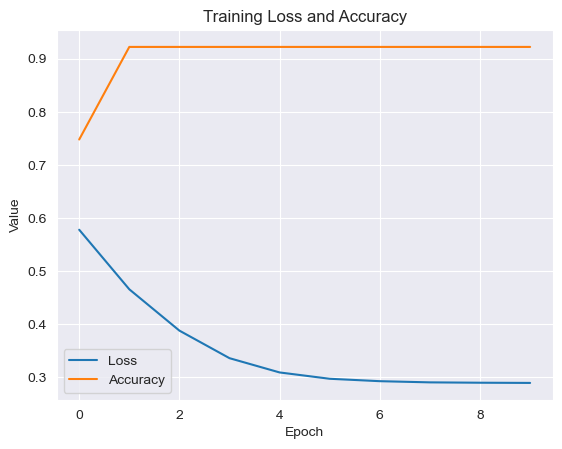

In [19]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Loss')

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Accuracy')

plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


In [20]:
# Evaluate model performance on validation set
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Loss: 0.2613
Validation Accuracy: 0.9328


24/24 [==============================] - 0s 222us/step


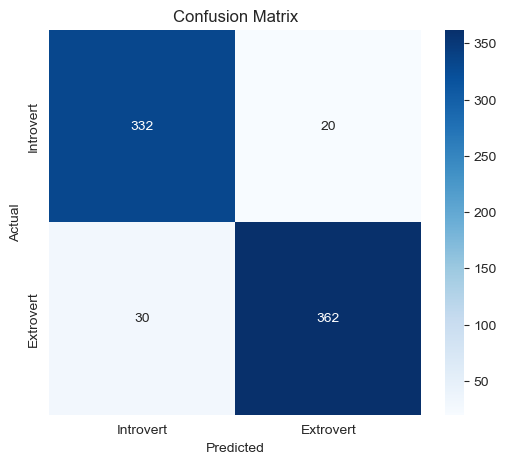

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict classes on validation data
y_pred_probs = model.predict(X_val)
y_pred = y_pred_probs.argmax(axis=1)  # for multi-class; for binary use (y_pred_probs > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=["Introvert","Extrovert"] ,yticklabels=["Introvert","Extrovert"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [16]:
from sklearn.metrics import classification_report

#Generate classification report
print(classification_report(y_val, y_pred, target_names=['Introvert', 'Extrovert']))

              precision    recall  f1-score   support

   Introvert       0.92      0.94      0.93       352
   Extrovert       0.95      0.92      0.94       392

    accuracy                           0.93       744
   macro avg       0.93      0.93      0.93       744
weighted avg       0.93      0.93      0.93       744



# Export model

In [15]:
# Export model to local
model.save('personality_model.h5')